In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import fit_functions as ff
import load_data as ld
import data_processing as dp
import matplotlib.animation as animation

C:\Users\au622616\AppData\Local\Temp\ipykernel_18840\164012588.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
path = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\U shaped measurements\Measurements_2024-02-16\10-03-34single_measurement_PD background noise,\ESA_spectrum_PD background"
path_spectrum = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\U shaped measurements\Measurements_2024-02-16\2024-02-16_11-28-07single_measurement_EOM_on_80MHz\2024-02-16_11-28-07_ESA_full_spectrum_, EOM on at 80 MHz, ,feedback_None"
path_bg = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\U shaped measurements\Measurements_2024-02-16\2024-02-16_11-29-30single_measurement_EOM_off\2024-02-16_11-29-30_ESA_full_spectrum_, EOM off,feedback_None"

peak1 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\U shaped measurements\2024-02-16_16-43-56single_measurement_EOM_on_80MHz\2024-02-16_16-43-56_ESA_peak_spectrum_, EOM on at 80 MHz, ,feedback_-57.08 dB.txt"
peak1_bg = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\U shaped measurements\2024-02-16_16-43-56single_measurement_EOM_on_80MHz\2024-02-16_16-43-56_ESA_peak_spectrum_, EOM off,feedback_-57.08 dB.txt"

directory = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\U shaped measurements\2024-02-16_16-43-56single_measurement_EOM_on_80MHz"
directory2 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_13-07-30single_measurement_"
directory3 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_15-15-26single_measurement_"
directory4 =  r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_14-05-29single_measurement_"
directory5 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_14-43-40single_measurement_"
directory6 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_15-02-33single_measurement_"

data_dir = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18"

dirs = ld.get_all_data(data_dir)





O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_13-07-30single_measurement_
O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_13-29-39single_measurement_
O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_13-38-54single_measurement_
O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_13-43-07single_measurement_
O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_13-48-29single_measurement_
O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_13-56-22single_measurement_
O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_14-01-

c:\Users\au622616\OneDrive - Aarhus universitet\Documents\Git repo\PICLab-narrow-linewidth\feedback-u-shaped-laser\data_processing.py:61: RuntimeWarning: divide by zero encountered in log10
  powers_difference = 10*np.log10(powers_difference_lin)


O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-18\2024-02-18_15-33-22single_measurement_


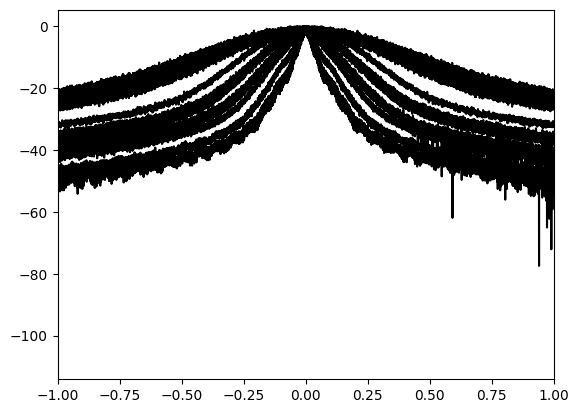

In [13]:
fig, ax = plt.subplots()
artists = []
for directory in dirs:
    if ('Read' not in directory) and ('PD' not in directory):
        print(directory)
        plt.xlim([-1,1])
        fs, ps = dp.get_close_spectrum_from_folder(directory,plot=False,center_about_carrier=True)
        container = ax.plot(fs,ps,color='black')
        artists.append(container)



In [12]:
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()
from IPython.display import HTML
HTML(ani.to_jshtml())

AttributeError: module 'fit_functions' has no attribute 'gauss_log'

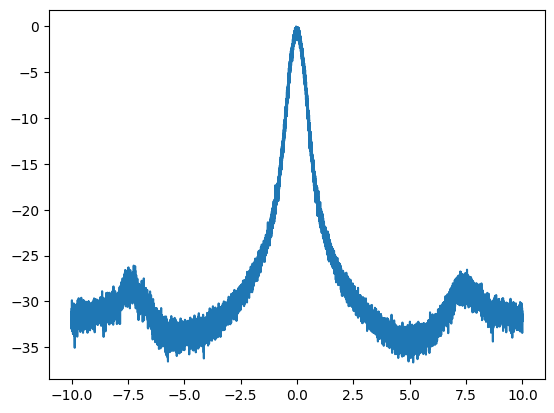

In [7]:
#fs, ps = get_close_spectrum_from_folder(directory)
gauss_fwhm, lor_fwhm = dp.fit_profile(fs,ps,.5,2,3)
plt.xlim([-1,1])
plt.ylim([-5,5])
gauss_fwhm

(0.20954014423296183, 0.9530219289657349)

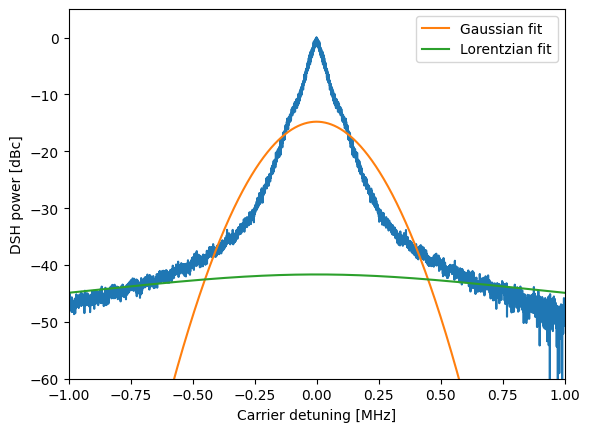

In [ ]:
gauss_fwhm, lor_fwhm = dp.fit_profile_from_folder(directory3,.5,1,3)
plt.xlim([-1,1])
plt.ylim([-60,5])
gauss_fwhm/np.sqrt(2), lor_fwhm/2

In [ ]:
'TEST4'

'TEST4'